#  King county sales

## 1. Introduction

As a consultant, my client, Sunset Real Estate Comany, is currently exploring the idea of purchasing properties to remodel either for the purpose selling or renting to prospective clients in King County.

The client would like to know if and how age, bedrooms, age and location affect housing in King county 

I will analyse the current housing data from King's County to understand better the different factors and areas affecting housing within the county and advice on the best investment strategy.

### Objective

1. To find how age, bedrooms, age and location affect housing

2. To advice on the best investment strategy

### Columns
id - unique identified for a house

date - house was sold

price - is prediction target

bedrooms- of Bedrooms/House

bathrooms- of bathrooms/bedrooms

sqft_living - footage of the home

sqft_lot - footage of the lot

floors - Total floors (levels) in house

waterfront - House which has a view to a waterfront

view - Has been viewed

condition - How good the condition is ( Overall )

grade - overall grade given to the housing unit, based on King County grading system

sqft_above - square footage of house apart from basement

sqft_basement - square footage of the basement

yr_built - Built Year

yr_renovated - Year when house was renovated

zipcode - zip

lat - Latitude coordinate

long - Longitude coordinate

sqft_living15 - The avg square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The avg square footage of the land lots of the nearest 15 neighbors

### Importing data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score





### Load and exploring dataset

In [2]:
#open datatset
df = pd.read_csv('kc_house_data.csv',index_col=0)

In [3]:
#explore the data
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id                                                                             
7129300520  10/13/2014  221900.0         3       1.00         1180      5650   
6414100192   12/9/2014  538000.0         3       2.25         2570      7242   
5631500400   2/25/2015  180000.0         2       1.00          770     10000   
2487200875   12/9/2014  604000.0         4       3.00         1960      5000   
1954400510   2/18/2015  510000.0         3       2.00         1680      8080   

            floors  waterfront  view  condition  grade  sqft_above  \
id                                                                   
7129300520     1.0         NaN   0.0          3      7        1180   
6414100192     2.0         0.0   0.0          3      7        2170   
5631500400     1.0         0.0   0.0          3      6         770   
2487200875     1.0         0.0   0.0          5      7        1050   
1954400510     1.0         0.0   0.0          3      8        1680   

           sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
id                                                                            
7129300520           0.0      1955           0.0    98178  47.5112 -122.257   
6414100192         400.0      1951        1991.0    98125  47.7210 -122.319   
5631500400           0.0      1933           NaN    98028  47.7379 -122.233   
2487200875         910.0      1965           0.0    98136  47.5208 -122.393   
1954400510           0.0      1987           0.0    98074  47.6168 -122.045   

            sqft_living15  sqft_lot15  
id                                     
7129300520           1340        5650  
6414100192           1690        7639  
5631500400           2720        8062  
2487200875           1360        5000  
1954400510           1800        7503

In [4]:
# Explore shape of the dataframes
df.shape
print('Number of rows =', df.shape[0])
print('Number of columns =', df.shape[1])

Number of rows = 21597
Number of columns = 20


In [5]:
#Get a full overview of the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [6]:
df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   5.402966e+05      3.373200      2.115826   2080.321850  1.509941e+04   
std    3.673681e+05      0.926299      0.768984    918.106125  4.141264e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068500e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21597.000000  19221.000000  21534.000000  21597.000000  21597.000000   
mean       1.494096      0.007596      0.233863      3.409825      7.657915   
std        0.539683      0.086825      0.765686      0.650546      1.173200   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above      yr_built  yr_renovated       zipcode           lat  \
count  21597.000000  21597.000000  17755.000000  21597.000000  21597.000000   
mean    1788.596842   1970.999676     83.636778  98077.951845     47.560093   
std      827.759761     29.375234    399.946414     53.513072      0.138552   
min      370.000000   1900.000000      0.000000  98001.000000     47.155900   
25%     1190.000000   1951.000000      0.000000  98033.000000     47.471100   
50%     1560.000000   1975.000000      0.000000  98065.000000     47.571800   
75%     2210.000000   1997.000000      0.000000  98118.000000     47.678000   
max     9410.000000   2015.000000   2015.000000  98199.000000     47.777600   

               long  sqft_living15     sqft_lot15  
count  21597.000000   21597.000000   21597.000000  
mean    -122.213982    1986.620318   12758.283512  
std        0.140724     685.230472   27274.441950  
min     -122.519000     399.000000     651.000000  
25%     -122.328000    1490.000000    5100.000000  
50%     -122.231000    1840.000000    7620.000000  
75%     -122.125000    2360.000000   10083.000000  
max     -121.315000    6210.000000  871200.000000

## Data Cleaning

I will clean the data in readiness for analysis.

From the data information, there are two columns that are strings:

date

sqft_basement

It kind of makes sense that the date column is encoded as an object and I will leave it at that for now.
I however will convert sqft_basement into a float/integer because it would make it more suitable for analysis. Aditionally the other related columns e.g. sqft_living, sqft_lot are in integer/float so it would make sense to convert it as well.

In [7]:
#I will explore value counts of sqft_basement to understand it better
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1481.0        1
1024.0        1
1930.0        1
666.0         1
2180.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [8]:
# There seems to be '?'
#I will replace '?'
df['sqft_basement'] = [0.0 if value == '?' else value for value in df['sqft_basement']]
#converting to numeric
df["sqft_basement"] = pd.to_numeric(df["sqft_basement"])

In [9]:
df['month'] = pd.to_datetime(df['date']).dt.month
df.drop(columns=['date'], inplace=True, axis = 1)

Next I will check for missing values

In [10]:
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
month               0
dtype: int64

There are alot of NaN values relative to the size of the datset (21597 entries). Dropping the rows i not the most appropriate channel as it would shrink the data.
Exploring the results from the df.describe in cells above, I will replace the Nans with median values.

In [11]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [12]:
df['waterfront'] = df['waterfront'].fillna(df.waterfront.median())
df['yr_renovated'] = df['yr_renovated'].fillna(df.yr_renovated.median())
df['view'] = df['view'].fillna(df.view.median())

In [13]:
# Exploring Zipcodes
#Covers 70 zipcodes
df.zipcode.value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [14]:
df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   5.402966e+05      3.373200      2.115826   2080.321850  1.509941e+04   
std    3.673681e+05      0.926299      0.768984    918.106125  4.141264e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068500e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       1.494096      0.006760      0.233181      3.409825      7.657915   
std        0.539683      0.081944      0.764673      0.650546      1.173200   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21597.000000   21597.000000  21597.000000  21597.000000  21597.000000   
mean    1788.596842     285.716581   1970.999676     68.758207  98077.951845   
std      827.759761     439.819830     29.375234    364.037499     53.513072   
min      370.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     550.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15         month  
count  21597.000000  21597.000000   21597.000000   21597.000000  21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512      6.573969  
std        0.138552      0.140724     685.230472   27274.441950      3.115061  
min       47.155900   -122.519000     399.000000     651.000000      1.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000      4.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000      6.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000      9.000000  
max       47.777600   -121.315000    6210.000000  871200.000000     12.000000

#### Additional observations
Price column seems to be the price since last sold. This could be an out of date column if it has been a long while since last sold. 
We should make a 2 features:
1. age of home 
2. how many years since last sold.

Sqft_living15 seems to be an average of the 15 properties around sqft_lot15 seems to be average of 15 lots around

The data is about houses in zipcodes around Seattle, WA.

The dependent variable is Price and min value is 78000 and max is 7,700,000 and a mean of 540296 and median of 450000.

sq_ft living ranges from 370 to 13540 sf ft.

bedrooms range from 1 to 33 with a mean of 3.37 and median of 3.

sqft_lot range from 520 to 1651359.0 with mean of 15099 and median of 7618.

zipcode-70 zipcodes

grade - grade from kings county grading system 3-13

condition- 1 to 5 with 5 being best

view- has been viewed  between 0 - 4 times

waterfront- view of waterfront is 0-1, 1 being yes


In [15]:
df['age_home'] = 2015 - df['yr_built']


df['yrsince_reno'] = [(2015 - val)  if (val !=0.0) else None for val in df['yr_renovated'] ]
#expression1 if condition else expression2 for item in iterable
df['yrsince_reno'] = df['yrsince_reno'].fillna(df['age_home'])

In [16]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                         
7129300520  221900.0         3       1.00         1180      5650     1.0   
6414100192  538000.0         3       2.25         2570      7242     2.0   
5631500400  180000.0         2       1.00          770     10000     1.0   
2487200875  604000.0         4       3.00         1960      5000     1.0   
1954400510  510000.0         3       2.00         1680      8080     1.0   

            waterfront  view  condition  grade  ...  yr_built  yr_renovated  \
id                                              ...                           
7129300520         0.0   0.0          3      7  ...      1955           0.0   
6414100192         0.0   0.0          3      7  ...      1951        1991.0   
5631500400         0.0   0.0          3      6  ...      1933           0.0   
2487200875         0.0   0.0          5      7  ...      1965           0.0   
1954400510         0.0   0.0          3      8  ...      1987           0.0   

            zipcode      lat     long  sqft_living15  sqft_lot15  month  \
id                                                                        
7129300520    98178  47.5112 -122.257           1340        5650     10   
6414100192    98125  47.7210 -122.319           1690        7639     12   
5631500400    98028  47.7379 -122.233           2720        8062      2   
2487200875    98136  47.5208 -122.393           1360        5000     12   
1954400510    98074  47.6168 -122.045           1800        7503      2   

            age_home  yrsince_reno  
id                                  
7129300520        60          60.0  
6414100192        64          24.0  
5631500400        82          82.0  
2487200875        50          50.0  
1954400510        28          28.0  

[5 rows x 22 columns]

## EDA of data


In [17]:
df.drop(columns=['yr_built', 'yr_renovated'],inplace=True)

In [18]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                         
7129300520  221900.0         3       1.00         1180      5650     1.0   
6414100192  538000.0         3       2.25         2570      7242     2.0   
5631500400  180000.0         2       1.00          770     10000     1.0   
2487200875  604000.0         4       3.00         1960      5000     1.0   
1954400510  510000.0         3       2.00         1680      8080     1.0   

            waterfront  view  condition  grade  sqft_above  sqft_basement  \
id                                                                          
7129300520         0.0   0.0          3      7        1180            0.0   
6414100192         0.0   0.0          3      7        2170          400.0   
5631500400         0.0   0.0          3      6         770            0.0   
2487200875         0.0   0.0          5      7        1050          910.0   
1954400510         0.0   0.0          3      8        1680            0.0   

            zipcode      lat     long  sqft_living15  sqft_lot15  month  \
id                                                                        
7129300520    98178  47.5112 -122.257           1340        5650     10   
6414100192    98125  47.7210 -122.319           1690        7639     12   
5631500400    98028  47.7379 -122.233           2720        8062      2   
2487200875    98136  47.5208 -122.393           1360        5000     12   
1954400510    98074  47.6168 -122.045           1800        7503      2   

            age_home  yrsince_reno  
id                                  
7129300520        60          60.0  
6414100192        64          24.0  
5631500400        82          82.0  
2487200875        50          50.0  
1954400510        28          28.0

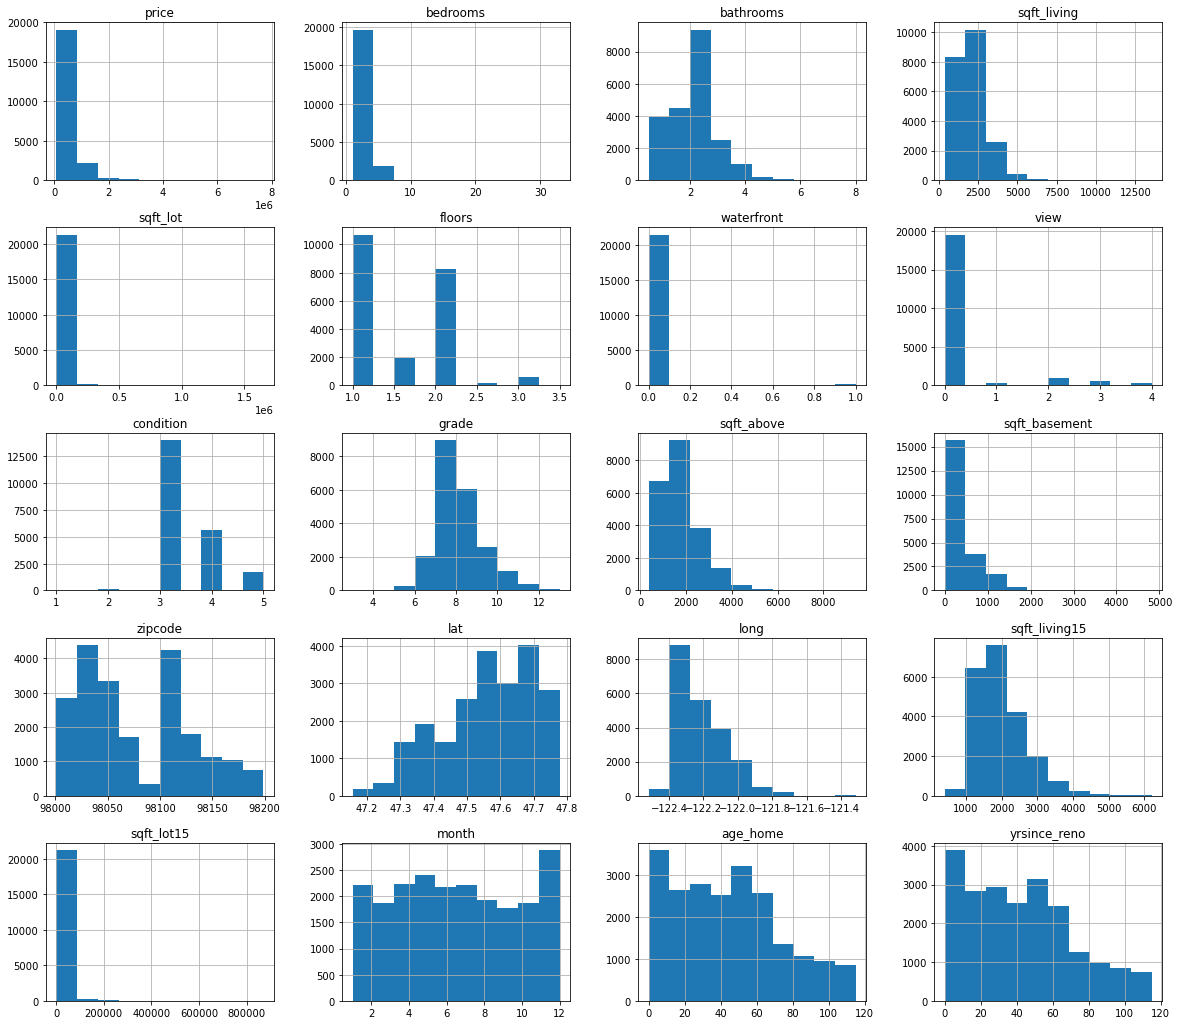

In [19]:
df.hist(figsize = (20,18));

Price looks to be right skewed. 

We will look for linearity between different pairs of data.

Check for Linearity

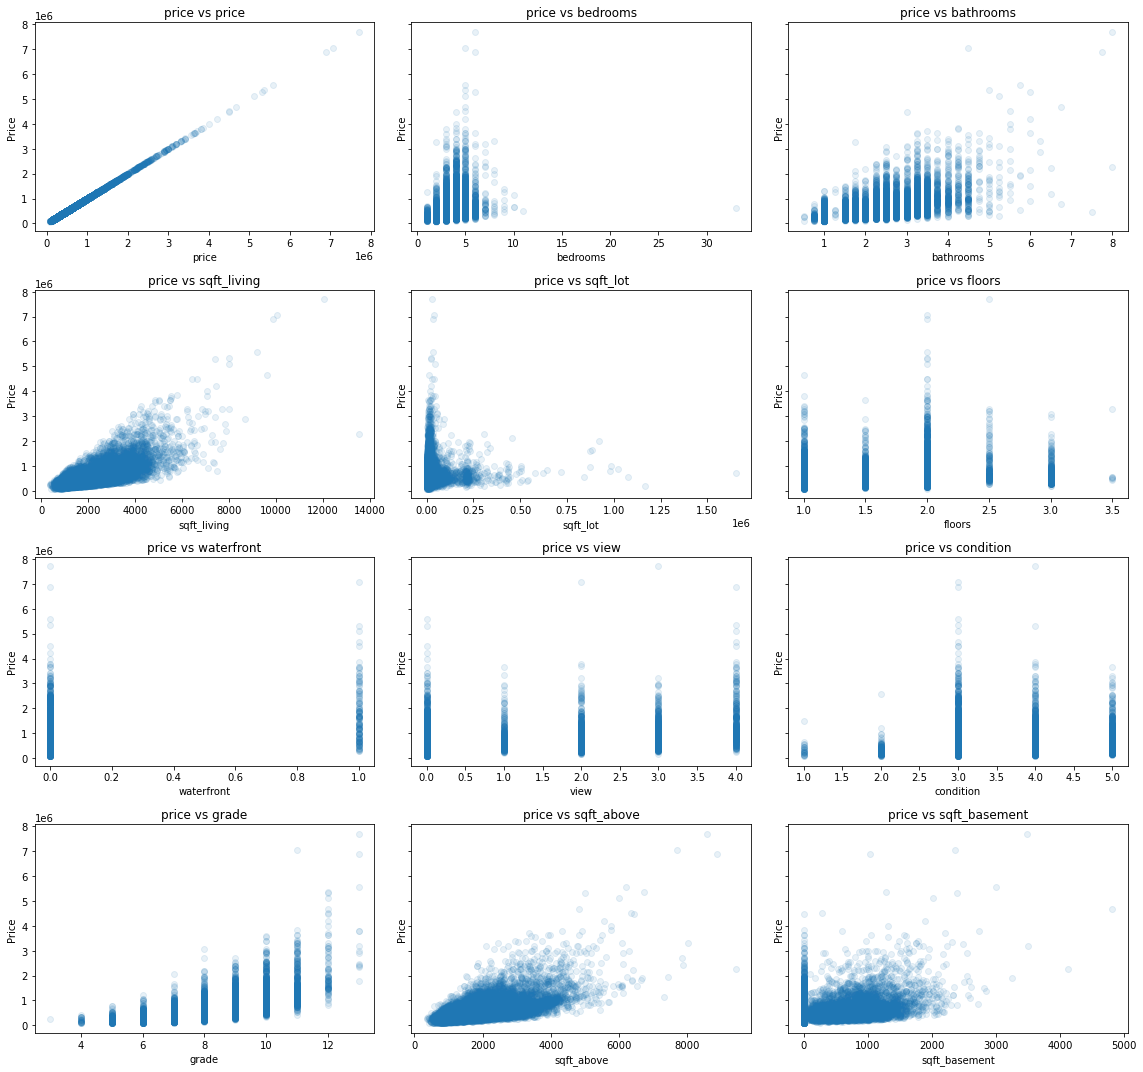

In [20]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(),df.columns):
    ax.scatter(df[column], df['price'] , label=column, alpha=.1)
    ax.set_title(f'price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price')

fig.tight_layout()

There is an outlier of 30+ bedrooms. Note: we should remove the outlier.

I will then check for multicollinearity
A pairwise correlations over .65 is a sign of multicolinearity

In [21]:
#create a coariance matrix
corr = df.corr()
corr

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308787   0.525906     0.701917  0.089876  0.256804   
bedrooms       0.308787  1.000000   0.514508     0.578212  0.032471  0.177944   
bathrooms      0.525906  0.514508   1.000000     0.755758  0.088373  0.502582   
sqft_living    0.701917  0.578212   0.755758     1.000000  0.173453  0.353953   
sqft_lot       0.089876  0.032471   0.088373     0.173453  1.000000 -0.004814   
floors         0.256804  0.177944   0.502582     0.353953 -0.004814  1.000000   
waterfront     0.264306 -0.002127   0.063629     0.104637  0.021459  0.020797   
view           0.393497  0.078354   0.186016     0.281715  0.075054  0.028414   
condition      0.036056  0.026496  -0.126479    -0.059445 -0.008830 -0.264075   
grade          0.667951  0.356563   0.665838     0.762779  0.114731  0.458794   
sqft_above     0.605368  0.479386   0.686668     0.876448  0.184139  0.523989   
sqft_basement  0.321108  0.297229   0.278485     0.428660  0.015031 -0.241866   
zipcode       -0.053402 -0.154092  -0.204786    -0.199802 -0.129586 -0.059541   
lat            0.306692 -0.009951   0.024280     0.052155 -0.085514  0.049239   
long           0.022036  0.132054   0.224903     0.241214  0.230227  0.125943   
sqft_living15  0.585241  0.393406   0.569884     0.756402  0.144763  0.280102   
sqft_lot15     0.082845  0.030690   0.088303     0.184342  0.718204 -0.010722   
month         -0.009928 -0.001046   0.007543     0.012112 -0.002591  0.014245   
age_home      -0.053953 -0.155670  -0.507173    -0.318152 -0.052946 -0.489193   
yrsince_reno  -0.097541 -0.164392  -0.532389    -0.339146 -0.051870 -0.500721   

               waterfront      view  condition     grade  sqft_above  \
price            0.264306  0.393497   0.036056  0.667951    0.605368   
bedrooms        -0.002127  0.078354   0.026496  0.356563    0.479386   
bathrooms        0.063629  0.186016  -0.126479  0.665838    0.686668   
sqft_living      0.104637  0.281715  -0.059445  0.762779    0.876448   
sqft_lot         0.021459  0.075054  -0.008830  0.114731    0.184139   
floors           0.020797  0.028414  -0.264075  0.458794    0.523989   
waterfront       1.000000  0.380543   0.016648  0.082818    0.071778   
view             0.380543  1.000000   0.045622  0.249082    0.166017   
condition        0.016648  0.045622   1.000000 -0.146896   -0.158904   
grade            0.082818  0.249082  -0.146896  1.000000    0.756073   
sqft_above       0.071778  0.166017  -0.158904  0.756073    1.000000   
sqft_basement    0.083050  0.270629   0.168482  0.165843   -0.051175   
zipcode          0.028923  0.085059   0.002888 -0.185771   -0.261570   
lat             -0.012157  0.006321  -0.015102  0.113575   -0.001199   
long            -0.037628 -0.077702  -0.105877  0.200341    0.344842   
sqft_living15    0.083823  0.278928  -0.093072  0.713867    0.731767   
sqft_lot15       0.030658  0.073083  -0.003126  0.120981    0.195077   
month            0.008199 -0.005161   0.022388  0.008989    0.010153   
age_home         0.024487  0.054452   0.361592 -0.447865   -0.424037   
yrsince_reno     0.006891  0.026631   0.390264 -0.459334   -0.433434   

               sqft_basement   zipcode       lat      long  sqft_living15  \
price               0.321108 -0.053402  0.306692  0.022036       0.585241   
bedrooms            0.297229 -0.154092 -0.009951  0.132054       0.393406   
bathrooms           0.278485 -0.204786  0.024280  0.224903       0.569884   
sqft_living         0.428660 -0.199802  0.052155  0.241214       0.756402   
sqft_lot            0.015031 -0.129586 -0.085514  0.230227       0.144763   
floors             -0.241866 -0.059541  0.049239  0.125943       0.280102   
waterfront          0.083050  0.028923 -0.012157 -0.037628       0.083823   
view                0.270629  0.085059  0.006321 -0.077702       0.278928   
condition           0.168482  0.002888 -0.015102 -0.105877      -0.093072   
grade               0.165843 -0.1

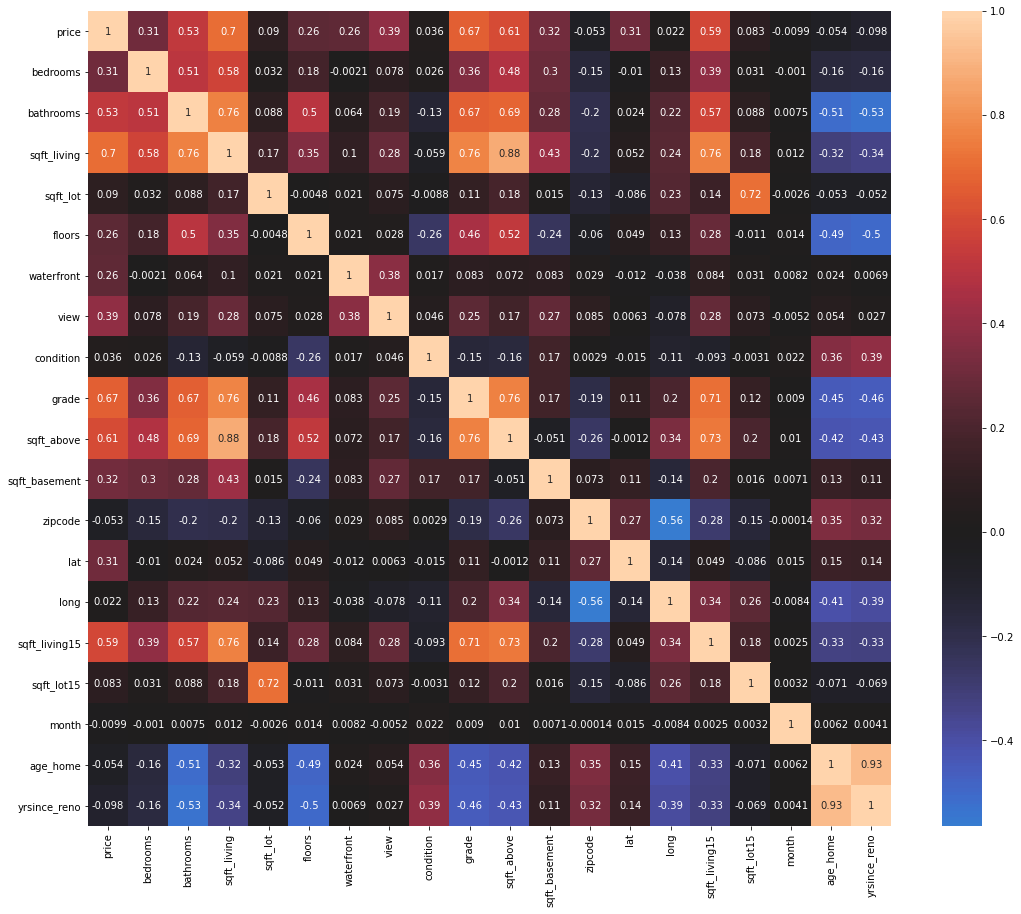

In [22]:
plt.figure(figsize=(18,15))
sns.heatmap(corr, center=0, annot=True);

In [23]:
abs(corr) > 0.65

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
price           True     False      False         True     False   False   
bedrooms       False      True      False        False     False   False   
bathrooms      False     False       True         True     False   False   
sqft_living     True     False       True         True     False   False   
sqft_lot       False     False      False        False      True   False   
floors         False     False      False        False     False    True   
waterfront     False     False      False        False     False   False   
view           False     False      False        False     False   False   
condition      False     False      False        False     False   False   
grade           True     False       True         True     False   False   
sqft_above     False     False       True         True     False   False   
sqft_basement  False     False      False        False     False   False   
zipcode        False     False      False        False     False   False   
lat            False     False      False        False     False   False   
long           False     False      False        False     False   False   
sqft_living15  False     False      False         True     False   False   
sqft_lot15     False     False      False        False      True   False   
month          False     False      False        False     False   False   
age_home       False     False      False        False     False   False   
yrsince_reno   False     False      False        False     False   False   

               waterfront   view  condition  grade  sqft_above  sqft_basement  \
price               False  False      False   True       False          False   
bedrooms            False  False      False  False       False          False   
bathrooms           False  False      False   True        True          False   
sqft_living         False  False      False   True        True          False   
sqft_lot            False  False      False  False       False          False   
floors              False  False      False  False       False          False   
waterfront           True  False      False  False       False          False   
view                False   True      False  False       False          False   
condition           False  False       True  False       False          False   
grade               False  False      False   True        True          False   
sqft_above          False  False      False   True        True          False   
sqft_basement       False  False      False  False       False           True   
zipcode             False  False      False  False       False          False   
lat                 False  False      False  False       False          False   
long                False  False      False  False       False          False   
sqft_living15       False  False      False   True        True          False   
sqft_lot15          False  False      False  False       False          False   
month               False  False      False  False       False          False   
age_home            False  False      False  False       False          False   
yrsince_reno        False  False      False  False       False          False   

               zipcode    lat   long  sqft_living15  sqft_lot15  month  \
price            False  False  False          False       False  False   
bedrooms         False  False  False          False       False  False   
bathrooms        False  False  False          False       False  False   
sqft_living      False  False  False           True       False  False   
sqft_lot         False  False  False          False        True  False   
floors           False  False  False          False       False  False   
waterfront       False  False  False          False       False  False   
view             False  False  False          False       False  False   
condition        False  False  False          Fals

## Model Building

With price as my target variable, I will now proceed to data modelling

### Model 1

Baseline model

In [24]:
outcome = 'price'
prediction_df = df.drop(['price', ], axis = 1)
prediction_variables = "+".join(prediction_df.columns)
formula = outcome + '~' + prediction_variables

In [25]:
baseline_model = ols(formula = formula, data = df).fit()
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2658.
Date:                Fri, 01 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:23:22   Log-Likelihood:            -2.9437e+05
No. Observations:               21597   AIC:                         5.888e+05
Df Residuals:                   21577   BIC:                         5.889e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.383e+06   2.88e+06      0.480      0.631   -4.27e+06    7.03e+06
bedrooms      -3.608e+04   1899.067    -18.996      0.000   -3.98e+04   -3.24e+04
bathrooms      4.161e+04   3265.913     12.740      0.000    3.52e+04     4.8e+04
sqft_living     102.2012     18.061      5.659      0.000      66.801     137.601
sqft_lot          0.1265      0.048      2.642      0.008       0.033       0.220
floors         7123.7217   3601.995      1.978      0.048      63.545    1.42e+04
waterfront     6.222e+05   1.81e+04     34.362      0.000    5.87e+05    6.58e+05
view           5.325e+04   2119.845     25.120      0.000    4.91e+04    5.74e+04
condition      2.718e+04   2351.760     11.556      0.000    2.26e+04    3.18e+04
grade          9.675e+04   2160.390     44.785      0.000    9.25e+04    1.01e+05
sqft_above       79.2190     18.052      4.388      0.000      43.835     114.603
sqft_basement    48.5862     17.891      2.716      0.007      13.518      83.654
zipcode        -586.4325     32.963    -17.791      0.000    -651.042    -521.823
lat            6.017e+05   1.07e+04     56.068      0.000    5.81e+05    6.23e+05
long          -2.187e+05   1.31e+04    -16.632      0.000   -2.44e+05   -1.93e+05
sqft_living15    21.4439      3.449      6.217      0.000      14.683      28.204
sqft_lot15       -0.3828      0.073     -5.223      0.000      -0.526      -0.239
month         -3077.7428    439.673     -7.000      0.000   -3939.534   -2215.952
age_home       3318.9279    127.392     26.053      0.000    3069.231    3568.625
yrsince_reno   -680.4897    130.944     -5.197      0.000    -937.150    -423.829
==============================================================================
Omnibus:                    18359.875   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1843186.769
Skew:                           3.567   Prob(JB):                         0.00
Kurtosis:                      47.692   Cond. No.                     2.12e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpretation from the baseline model:

Bedrooms have a negative coefficient. This means that as the bedrooms increase, the price decreases.

Price per sqft is about $102

Zipcode has a negative coefficent. There is a need to look into how to get location data in the model

sqft_lot15 has a neg coef

floors .062 not relevant


In [26]:
X = prediction_df
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [27]:
baseline_linreg = LinearRegression()
baseline_linreg.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = baseline_linreg.predict(X_test)
residuals = y_pred - y_test

In [29]:
baseline_linreg.coef_

array([-3.90943760e+04,  4.15590352e+04,  1.23996301e+02,  1.66338586e-01,
        1.11043174e+04,  6.03253067e+05,  5.41158521e+04,  2.57055225e+04,
        9.82648551e+04,  5.23764884e+01,  3.01996929e+01, -5.95269513e+02,
        5.99540311e+05, -2.09172192e+05,  2.42268704e+01, -4.34823214e-01,
       -3.58522041e+03,  3.23867610e+03, -5.75749069e+02])

In [30]:
mse_train = mean_squared_error(y_train, baseline_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 199556.07673759927
Test RMSE: 205495.70367614715


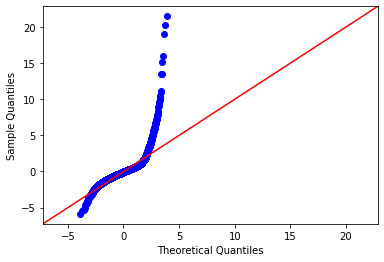

In [31]:
fig = sm.graphics.qqplot(baseline_model.resid, dist=stats.norm, line='45', fit=True)

### Model 2
Dealing with outliers

In [32]:
df.describe().T

count           mean            std         min          25%  \
price          21597.0  540296.573506  367368.140101  78000.0000  322000.0000   
bedrooms       21597.0       3.373200       0.926299      1.0000       3.0000   
bathrooms      21597.0       2.115826       0.768984      0.5000       1.7500   
sqft_living    21597.0    2080.321850     918.106125    370.0000    1430.0000   
sqft_lot       21597.0   15099.408760   41412.636876    520.0000    5040.0000   
floors         21597.0       1.494096       0.539683      1.0000       1.0000   
waterfront     21597.0       0.006760       0.081944      0.0000       0.0000   
view           21597.0       0.233181       0.764673      0.0000       0.0000   
condition      21597.0       3.409825       0.650546      1.0000       3.0000   
grade          21597.0       7.657915       1.173200      3.0000       7.0000   
sqft_above     21597.0    1788.596842     827.759761    370.0000    1190.0000   
sqft_basement  21597.0     285.716581     439.819830      0.0000       0.0000   
zipcode        21597.0   98077.951845      53.513072  98001.0000   98033.0000   
lat            21597.0      47.560093       0.138552     47.1559      47.4711   
long           21597.0    -122.213982       0.140724   -122.5190    -122.3280   
sqft_living15  21597.0    1986.620318     685.230472    399.0000    1490.0000   
sqft_lot15     21597.0   12758.283512   27274.441950    651.0000    5100.0000   
month          21597.0       6.573969       3.115061      1.0000       4.0000   
age_home       21597.0      44.000324      29.375234      0.0000      18.0000   
yrsince_reno   21597.0      42.054869      28.945393      0.0000      16.0000   

                       50%         75%           max  
price          450000.0000  645000.000  7.700000e+06  
bedrooms            3.0000       4.000  3.300000e+01  
bathrooms           2.2500       2.500  8.000000e+00  
sqft_living      1910.0000    2550.000  1.354000e+04  
sqft_lot         7618.0000   10685.000  1.651359e+06  
floors              1.5000       2.000  3.500000e+00  
waterfront          0.0000       0.000  1.000000e+00  
view                0.0000       0.000  4.000000e+00  
condition           3.0000       4.000  5.000000e+00  
grade               7.0000       8.000  1.300000e+01  
sqft_above       1560.0000    2210.000  9.410000e+03  
sqft_basement       0.0000     550.000  4.820000e+03  
zipcode         98065.0000   98118.000  9.819900e+04  
lat                47.5718      47.678  4.777760e+01  
long             -122.2310    -122.125 -1.213150e+02  
sqft_living15    1840.0000    2360.000  6.210000e+03  
sqft_lot15       7620.0000   10083.000  8.712000e+05  
month               6.0000       9.000  1.200000e+01  
age_home           40.0000      64.000  1.150000e+02  
yrsince_reno       38.0000      61.000  1.150000e+02

In [33]:
#removed 75 rows based off bathroom outliers
print(len(df[df.bathrooms >= 1]))
df_no_out = df[df.bathrooms >= 1]

21522


In [34]:
#Clean outliers where z score is > 3
#not cleaning zscore outliers where negative as smaller is good.
z = stats.zscore(df_no_out)
print(z)

[[-0.86846203 -0.4100402  -1.46302691 ...  1.09994241  0.5483327
   0.62382621]
 [-0.00860214 -0.4100402   0.16889421 ...  1.74207773  0.68460855
  -0.62107545]
 [-0.98243903 -1.49404526 -1.46302691 ... -1.46859886  1.29784989
   1.38459945]
 ...
 [-0.49280037 -0.4100402   0.49527843 ... -0.50539588 -1.29139132
  -1.24352627]
 [-0.38399178  0.67396486  0.49527843 ... -1.46859886 -1.46173614
  -1.41642928]
 [-0.38399178 -0.4100402   0.49527843 ... -1.78966651 -1.1210465
  -1.07062327]]


In [35]:
threshold = 3.0
print(np.where(z > threshold))

(array([    5,     5,     5, ..., 21501, 21501, 21511]), array([ 2,  3, 15, ..., 11, 15, 10]))


In [36]:
df_no_out = df_no_out[(z < 3).all(axis=1)]

In [37]:
len(df_no_out)

19414

In [38]:
#Removed .4.5% of values with z score > 3
1000/22000

0.045454545454545456

In [39]:
df_no_out.describe().transpose()

count           mean            std         min  \
price          19414.0  485517.582672  235534.086045  78000.0000   
bedrooms       19414.0       3.326362       0.850796      1.0000   
bathrooms      19414.0       2.043989       0.689058      1.0000   
sqft_living    19414.0    1954.245029     739.253602    390.0000   
sqft_lot       19414.0    9838.962759   11482.568780    520.0000   
floors         19414.0       1.481482       0.538460      1.0000   
waterfront     19414.0       0.000000       0.000000      0.0000   
view           19414.0       0.094622       0.406838      0.0000   
condition      19414.0       3.411456       0.649497      1.0000   
grade          19414.0       7.533378       1.026960      4.0000   
sqft_above     19414.0    1695.321263     705.699618    390.0000   
sqft_basement  19414.0     253.491913     386.995893      0.0000   
zipcode        19414.0   98079.025394      53.409019  98001.0000   
lat            19414.0      47.561098       0.139716     47.1764   
long           19414.0    -122.222351       0.128496   -122.5020   
sqft_living15  19414.0    1906.594313     596.902645    460.0000   
sqft_lot15     19414.0    9070.746935    8986.718709    651.0000   
month          19414.0       6.573401       3.118406      1.0000   
age_home       19414.0      44.429999      29.461394      0.0000   
yrsince_reno   19414.0      42.700577      29.101505      0.0000   

                         25%          50%          75%           max  
price          314950.000000  435000.0000  601113.0000  1.640000e+06  
bedrooms            3.000000       3.0000       4.0000  6.000000e+00  
bathrooms           1.500000       2.0000       2.5000  4.250000e+00  
sqft_living      1400.000000    1840.0000    2413.7500  4.750000e+03  
sqft_lot         5000.000000    7350.0000    9898.0000  1.372140e+05  
floors              1.000000       1.0000       2.0000  3.000000e+00  
waterfront          0.000000       0.0000       0.0000  0.000000e+00  
view                0.000000       0.0000       0.0000  2.000000e+00  
condition           3.000000       3.0000       4.0000  5.000000e+00  
grade               7.000000       7.0000       8.0000  1.100000e+01  
sqft_above       1170.000000    1510.0000    2100.0000  4.270000e+03  
sqft_basement       0.000000       0.0000     500.0000  1.600000e+03  
zipcode         98033.000000   98072.0000   98118.0000  9.819900e+04  
lat                47.470025      47.5732      47.6807  4.777760e+01  
long             -122.331000    -122.2410    -122.1360 -1.217970e+02  
sqft_living15    1460.000000    1790.0000    2260.0000  4.040000e+03  
sqft_lot15       5000.000000    7425.0000    9600.0000  9.382500e+04  
month               4.000000       6.0000       9.0000  1.200000e+01  
age_home           19.000000      41.0000      64.0000  1.150000e+02  
yrsince_reno       17.000000      39.0000      62.0000  1.150000e+02

In [40]:
df_no_out.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                         
7129300520  221900.0         3       1.00         1180      5650     1.0   
6414100192  538000.0         3       2.25         2570      7242     2.0   
5631500400  180000.0         2       1.00          770     10000     1.0   
2487200875  604000.0         4       3.00         1960      5000     1.0   
1954400510  510000.0         3       2.00         1680      8080     1.0   

            waterfront  view  condition  grade  sqft_above  sqft_basement  \
id                                                                          
7129300520         0.0   0.0          3      7        1180            0.0   
6414100192         0.0   0.0          3      7        2170          400.0   
5631500400         0.0   0.0          3      6         770            0.0   
2487200875         0.0   0.0          5      7        1050          910.0   
1954400510         0.0   0.0          3      8        1680            0.0   

            zipcode      lat     long  sqft_living15  sqft_lot15  month  \
id                                                                        
7129300520    98178  47.5112 -122.257           1340        5650     10   
6414100192    98125  47.7210 -122.319           1690        7639     12   
5631500400    98028  47.7379 -122.233           2720        8062      2   
2487200875    98136  47.5208 -122.393           1360        5000     12   
1954400510    98074  47.6168 -122.045           1800        7503      2   

            age_home  yrsince_reno  
id                                  
7129300520        60          60.0  
6414100192        64          24.0  
5631500400        82          82.0  
2487200875        50          50.0  
1954400510        28          28.0

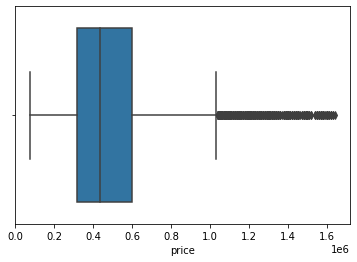

In [41]:
sns.boxplot(x=df_no_out.price);

In [42]:
df_no_out.shape

(19414, 20)

In [43]:
outcome = 'price'
prediction = df_no_out.drop(columns = ['price'], axis = 1)
prediction_variables = "+".join(prediction.columns)
formula = outcome + '~' + prediction_variables

In [44]:
model_2 = ols(formula = formula, data = df_no_out).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     2296.
Date:                Fri, 01 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:23:23   Log-Likelihood:            -2.5661e+05
No. Observations:               19414   AIC:                         5.133e+05
Df Residuals:                   19395   BIC:                         5.134e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.464e+06   2.04e+06     -2.682      0.007   -9.46e+06   -1.47e+06
bedrooms       -1.52e+04   1468.861    -10.350      0.000   -1.81e+04   -1.23e+04
bathrooms      2.944e+04   2430.605     12.114      0.000    2.47e+04    3.42e+04
sqft_living      79.1093     13.854      5.710      0.000      51.955     106.264
sqft_lot          0.2949      0.145      2.039      0.041       0.011       0.578
floors         2.867e+04   2614.632     10.966      0.000    2.35e+04    3.38e+04
waterfront     8.643e-05   3.22e-05      2.682      0.007    2.33e-05       0.000
view           4.007e+04   2440.801     16.418      0.000    3.53e+04    4.49e+04
condition      2.795e+04   1647.437     16.964      0.000    2.47e+04    3.12e+04
grade          8.605e+04   1572.833     54.711      0.000     8.3e+04    8.91e+04
sqft_above       19.5090     13.828      1.411      0.158      -7.595      46.613
sqft_basement    14.7239     13.723      1.073      0.283     -12.175      41.623
zipcode        -360.5726     23.305    -15.472      0.000    -406.252    -314.893
lat            5.702e+05   7455.107     76.485      0.000    5.56e+05    5.85e+05
long          -1.067e+05   1.05e+04    -10.213      0.000   -1.27e+05   -8.62e+04
sqft_living15    45.9353      2.716     16.915      0.000      40.612      51.258
sqft_lot15       -1.3497      0.188     -7.190      0.000      -1.718      -0.982
month         -2638.2377    306.866     -8.597      0.000   -3239.722   -2036.753
age_home       2775.0213     93.100     29.807      0.000    2592.536    2957.506
yrsince_reno   -597.2396     95.348     -6.264      0.000    -784.131    -410.349
==============================================================================
Omnibus:                     5210.084   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23325.254
Skew:                           1.247   Prob(JB):                         0.00
Kurtosis:                       7.756   Cond. No.                     4.85e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.1e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Interpretation from model 2:

Sqft_Basement and sqft_lot are no longer relevant features. We most probably will need to drop them in the next model

In [45]:
X = df_no_out.drop("price", axis = 1)
y = df_no_out['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [46]:
print(len(X_train))
print(len(X_test))

14560
4854


In [47]:
model2_linreg = LinearRegression()
model2_linreg.fit(X_train, y_train)
y_pred = model2_linreg.predict(X_test)
residuals = y_pred - y_test

In [48]:
model2_linreg.coef_

array([-1.75588206e+04,  3.03881587e+04,  7.71354998e+01,  2.01137320e-01,
        2.96185666e+04, -1.11991199e-08,  3.99040447e+04,  2.79544075e+04,
        8.40554808e+04,  2.31804598e+01,  1.94305246e+01, -3.59992121e+02,
        5.63352429e+05, -1.00326770e+05,  4.61978134e+01, -1.25093387e+00,
       -2.78296232e+03,  2.90233026e+03, -7.12588472e+02])

In [49]:
mse_train = mean_squared_error(y_train, model2_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 133260.63738175583
Test RMSE: 132772.3790252424


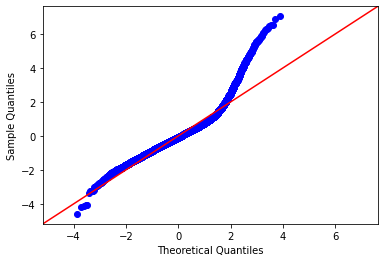

In [50]:
fig = sm.graphics.qqplot(model_2.resid, dist=stats.norm, line='45', fit=True)

### Model 3 

Fix Cat Features

In [51]:
print(df_no_out.condition.unique())
print(df_no_out.grade.unique())
print(df_no_out.view.unique())

[3 5 4 1 2]
[ 7  6  8  5  9 10 11  4]
[0. 2. 1.]


In [52]:
condition_dummies = pd.get_dummies(df_no_out['condition'], prefix = 'cond', drop_first= True)

In [53]:
grade_dummies = pd.get_dummies(df_no_out['grade'], prefix = 'grade', drop_first= True)

In [54]:
view_dummies = pd.get_dummies(df_no_out['view'], prefix = 'view', drop_first= True)

In [55]:
print(grade_dummies.shape)
print(view_dummies.shape)

(19414, 7)
(19414, 2)


In [56]:
df_no_out_dum = pd.concat([df_no_out,condition_dummies, grade_dummies, view_dummies], axis =1 )

In [57]:
df_no_out_dum.rename(columns={"view_1.0": "view_1", "view_2.0": "view_2"}, inplace=True)

In [58]:
df_no_out_dum.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                         
7129300520  221900.0         3       1.00         1180      5650     1.0   
6414100192  538000.0         3       2.25         2570      7242     2.0   
5631500400  180000.0         2       1.00          770     10000     1.0   
2487200875  604000.0         4       3.00         1960      5000     1.0   
1954400510  510000.0         3       2.00         1680      8080     1.0   

            waterfront  view  condition  grade  ...  cond_5  grade_5  grade_6  \
id                                              ...                             
7129300520         0.0   0.0          3      7  ...       0        0        0   
6414100192         0.0   0.0          3      7  ...       0        0        0   
5631500400         0.0   0.0          3      6  ...       0        0        1   
2487200875         0.0   0.0          5      7  ...       1        0        0   
1954400510         0.0   0.0          3      8  ...       0        0        0   

            grade_7  grade_8  grade_9  grade_10  grade_11  view_1  view_2  
id                                                                         
7129300520        1        0        0         0         0       0       0  
6414100192        1        0        0         0         0       0       0  
5631500400        0        0        0         0         0       0       0  
2487200875        1        0        0         0         0       0       0  
1954400510        0        1        0         0         0       0       0  

[5 rows x 33 columns]

In [59]:
df_no_out_dum.drop(columns=['condition', 'view', 'grade', 'sqft_basement',], inplace = True)

In [60]:
outcome = 'price'
prediction = df_no_out_dum.drop(columns = ['price'], axis = 1)
prediction_variables = "+".join(prediction.columns)
formula = outcome + '~' + prediction_variables

In [61]:
model_3 = ols(formula = formula, data = df_no_out_dum).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     1582.
Date:                Fri, 01 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:23:23   Log-Likelihood:            -2.5639e+05
No. Observations:               19414   AIC:                         5.128e+05
Df Residuals:                   19386   BIC:                         5.131e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.867e+06   2.03e+06     -1.414      0.158   -6.84e+06    1.11e+06
bedrooms      -1.089e+04   1472.088     -7.398      0.000   -1.38e+04   -8004.583
bathrooms      3.236e+04   2420.612     13.369      0.000    2.76e+04    3.71e+04
sqft_living      93.0735      3.451     26.972      0.000      86.310      99.837
sqft_lot          0.3203      0.143      2.237      0.025       0.040       0.601
floors         2.967e+04   2610.761     11.365      0.000    2.46e+04    3.48e+04
waterfront    -1.464e-05   2.28e-06     -6.420      0.000   -1.91e-05   -1.02e-05
sqft_above       -4.8312      3.388     -1.426      0.154     -11.471       1.809
zipcode        -389.7513     23.216    -16.788      0.000    -435.258    -344.245
lat            5.783e+05   7391.630     78.244      0.000    5.64e+05    5.93e+05
long          -1.102e+05   1.04e+04    -10.643      0.000   -1.31e+05   -8.99e+04
sqft_living15    41.1321      2.703     15.220      0.000      35.835      46.429
sqft_lot15       -1.4351      0.186     -7.721      0.000      -1.799      -1.071
month         -2605.2472    303.470     -8.585      0.000   -3200.075   -2010.419
age_home       2717.2194     92.123     29.495      0.000    2536.650    2897.789
yrsince_reno   -682.9364     94.668     -7.214      0.000    -868.493    -497.379
cond_2          1.82e+04   2.86e+04      0.636      0.525   -3.79e+04    7.43e+04
cond_3         3.702e+04   2.66e+04      1.392      0.164   -1.51e+04    8.91e+04
cond_4         6.536e+04   2.66e+04      2.457      0.014    1.32e+04    1.17e+05
cond_5         9.967e+04   2.68e+04      3.726      0.000    4.72e+04    1.52e+05
grade_5        1.629e+04   3.64e+04      0.447      0.655   -5.51e+04    8.77e+04
grade_6        5.007e+04   3.54e+04      1.413      0.158   -1.94e+04     1.2e+05
grade_7        1.029e+05   3.54e+04      2.907      0.004    3.35e+04    1.72e+05
grade_8        1.797e+05   3.55e+04      5.062      0.000     1.1e+05    2.49e+05
grade_9        3.091e+05   3.57e+04      8.653      0.000    2.39e+05    3.79e+05
grade_10       4.084e+05   3.61e+04     11.324      0.000    3.38e+05    4.79e+05
grade_11       5.031e+05   3.78e+04     13.321      0.000    4.29e+05    5.77e+05
view_1         9.266e+04   7958.219     11.644      0.000    7.71e+04    1.08e+05
view_2         7.256e+04   4977.149     14.578      0.000    6.28e+04    8.23e+04
==============================================================================
Omnibus:                     4987.464   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22236.209
Skew:                           1.192   Prob(JB):                         0.00
Kurtosis:                       7.670   Cond. No.                     1.00e+16
================================================================

In [62]:
X = df_no_out_dum.drop("price", axis = 1)
y = df_no_out_dum['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [63]:
print(len(X_train))
print(len(X_test))

14560
4854


In [64]:
model3_linreg = LinearRegression()
model3_linreg.fit(X_train, y_train)
y_pred = model3_linreg.predict(X_test)
residuals = y_pred - y_test

In [65]:
model3_linreg.coef_

array([-1.34192235e+04,  3.32982573e+04,  9.54517491e+01,  2.34368638e-01,
        3.04308481e+04, -4.70299142e-07, -5.21784373e+00, -3.90258579e+02,
        5.71099734e+05, -1.03858735e+05,  4.11221702e+01, -1.33497898e+00,
       -2.75998254e+03,  2.83407029e+03, -7.79844267e+02, -8.47021498e+01,
        1.84872622e+04,  4.68097489e+04,  8.12808732e+04,  2.01094481e+04,
        5.13128274e+04,  1.05272629e+05,  1.79999998e+05,  3.09332612e+05,
        3.99833844e+05,  4.95096221e+05,  9.35091701e+04,  7.22828170e+04])

In [66]:
mse_train = mean_squared_error(y_train, model3_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 131792.61312591666
Test RMSE: 131098.83128700836


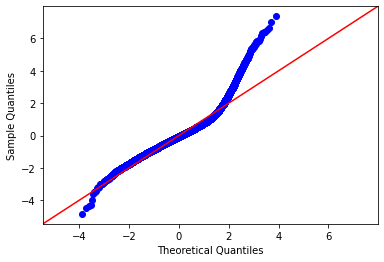

In [67]:
fig = sm.graphics.qqplot(model_3.resid, dist=stats.norm, line='45', fit=True)

In [70]:
def plot_brms(ax, brms):
    col = 'sqft_living'
    x = np.linspace(5.9, 8.5)
    
    is_in = df_no_out_dum.loc[df_no_out_dum['bedrooms'] == brms, [col, 'price']]
    linreg = LinearRegression()
    linreg.fit(np.log(is_in[[col]]), np.log(is_in['price']))
    preds = linreg.predict(np.log(is_in[[col]]))
    ax.scatter(np.log(is_in[[col]]), np.log(is_in['price']), alpha=.3, label=None)

    coef = f'{linreg.coef_[0]:.2f}'
    label = "Bedrooms_is {} : {}:".format(brms, coef)
    return ax.plot(x, linreg.predict(x.reshape(-1, 1)), label=label)

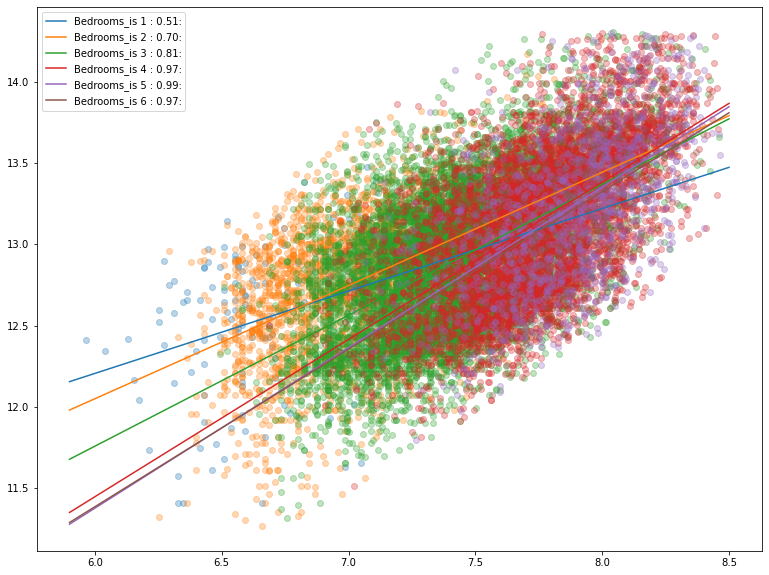

In [71]:
##Understanding negative correlation of bedrooms
# Visualization code here

fig, ax = plt.subplots(figsize=(13, 10))

for i in range(1,7):
    plot_brms(ax, i)

ax.legend()

In [73]:
try:
    bedrooms_df=df_no_out_dum.drop(columns=['sqft_lot', 'bathrooms','floors', 'age',
       'waterfront', 'yrsince_reno', 'sqft_above', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'cond_2', 'cond_3', 'cond_4', 'cond_5',
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10',
       'grade_11', 'view_1', 'view_2', 'log_price', 'log_sqft_living',
       'log_sqft_lot', 'log_sqft_living15', 'log_sqft_lot15',
       ])
except:
    bedrooms_df=df_no_out_dum

In [74]:
bedrooms_df['price_per_bedroom'] = bedrooms_df['price']/bedrooms_df['bedrooms']
bedrooms_df['price_per_sqft'] = bedrooms_df['price']/bedrooms_df['sqft_living']

In [75]:
br_group=bedrooms_df.groupby(by='bedrooms').mean()
br_group[['price','price_per_bedroom','sqft_living','price_per_sqft']]

price  price_per_bedroom  sqft_living  price_per_sqft
bedrooms                                                               
1         318095.961039      318095.961039   891.870130      379.559994
2         388937.274487      194468.637244  1211.135114      331.642408
3         443293.384936      147764.461645  1755.485068      257.133547
4         562155.756885      140538.939221  2407.639180      234.117496
5         616760.016406      123352.003281  2714.442187      227.489489
6         614325.417989      102387.569665  2772.275132      222.587697

In [77]:
br_group.head()

price  bathrooms  sqft_living      sqft_lot    floors  \
bedrooms                                                                  
1         318095.961039   1.137987   891.870130   8527.441558  1.159091   
2         388937.274487   1.392567  1211.135114   6876.745257  1.303910   
3         443293.384936   1.946832  1755.485068   9588.131752  1.446091   
4         562155.756885   2.355902  2407.639180  11203.097377  1.605984   
5         616760.016406   2.583008  2714.442187  11000.510156  1.535156   

          waterfront   sqft_above       zipcode        lat        long  ...  \
bedrooms                                                                ...   
1                0.0   824.467532  98107.870130  47.575715 -122.291981  ...   
2                0.0  1085.655439  98107.993806  47.593372 -122.286808  ...   
3                0.0  1546.382521  98076.901845  47.553847 -122.222222  ...   
4                0.0  2090.201148  98070.180492  47.555090 -122.195119  ...   
5                0.0  2149.189063  98074.130469  47.570495 -122.210457  ...   

           grade_6   grade_7   grade_8   grade_9  grade_10  grade_11  \
bedrooms                                                               
1         0.402597  0.298701  0.071429  0.012987  0.000000  0.000000   
2         0.303523  0.444057  0.181959  0.023229  0.005033  0.000387   
3         0.089921  0.516249  0.286342  0.074879  0.023825  0.003074   
4         0.037213  0.346393  0.337049  0.193443  0.069344  0.013607   
5         0.029687  0.377344  0.318750  0.189844  0.071875  0.008594   

            view_1    view_2  price_per_bedroom  price_per_sqft  
bedrooms                                                         
1         0.006494  0.025974      318095.961039      379.559994  
2         0.015486  0.032907      194468.637244      331.642408  
3         0.012516  0.035793      147764.461645      257.133547  
4         0.017213  0.042951      140538.939221      234.117496  
5         0.019531  0.064844      123352.003281      227.489489  

[5 rows x 30 columns]

In [78]:
bedrooms_df.bedrooms.value_counts()

3    9108
4    6100
2    2583
5    1280
6     189
1     154
Name: bedrooms, dtype: int64

### Model 4 
Transformations

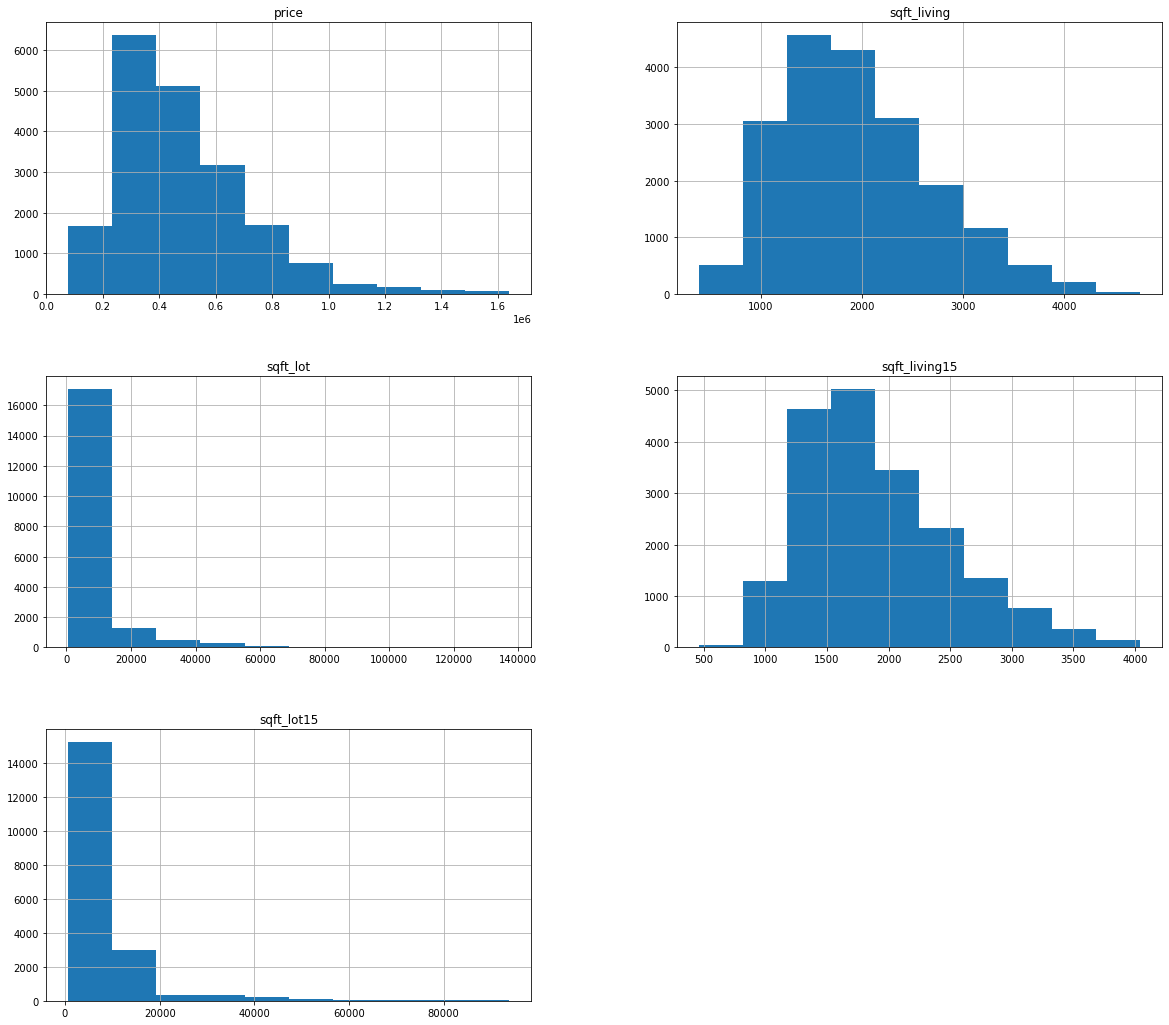

In [84]:
df_no_out_dum[['price', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']].hist(figsize = (20,18));

plt.show()

In [85]:
def transform_cols(cols):
    
    for col in cols:
        newcol = 'log_'+col
        df_no_out_dum[newcol] = np.log(df_no_out_dum[col])

In [86]:
cols=['price','sqft_living','sqft_lot', 'sqft_living15', 'sqft_lot15']
transform_cols(cols)

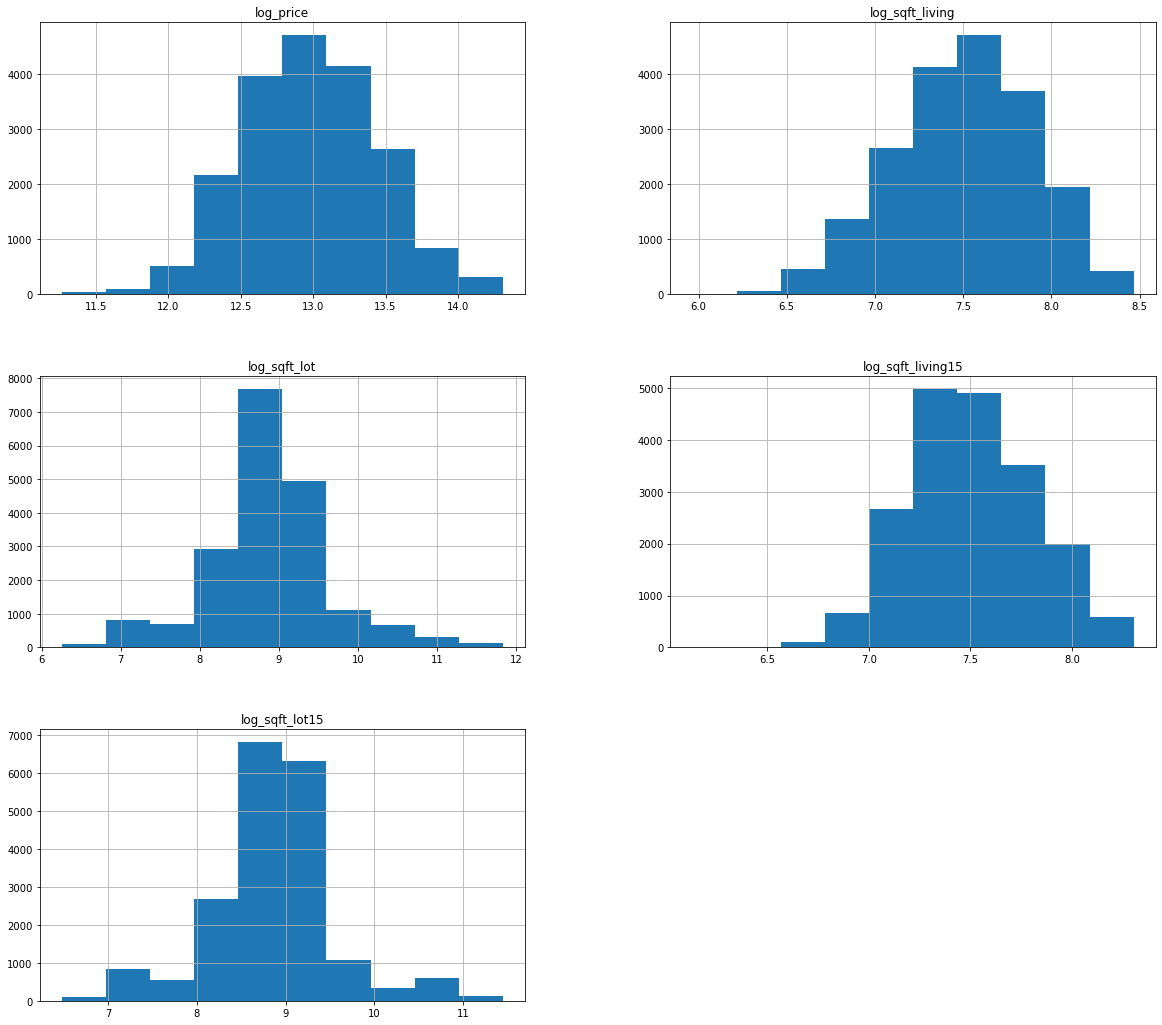

In [89]:
df_no_out_dum[['log_price','log_sqft_living', 'log_sqft_lot', 'log_sqft_living15', 'log_sqft_lot15']].hist(figsize = (20,18));
plt.show()

In [91]:
df_log = df_no_out_dum.drop(columns = ['price',
                                           'sqft_living', 
                                           'sqft_lot', 
                                           'sqft_living15', 
                                           'sqft_lot15', 
                                           'sqft_above', 
                                           'grade_5',
                                          ], axis = 1)

In [92]:
df_log = df_log.drop(columns = ['price_per_bedroom',
                                           'price_per_sqft', 
                                           
                                          ], axis = 1)

In [93]:
outcome = 'log_price'
prediction = df_log.drop(columns = ['log_price'], axis = 1)
prediction_variables = "+".join(prediction.columns)
formula = outcome + '~' + prediction_variables

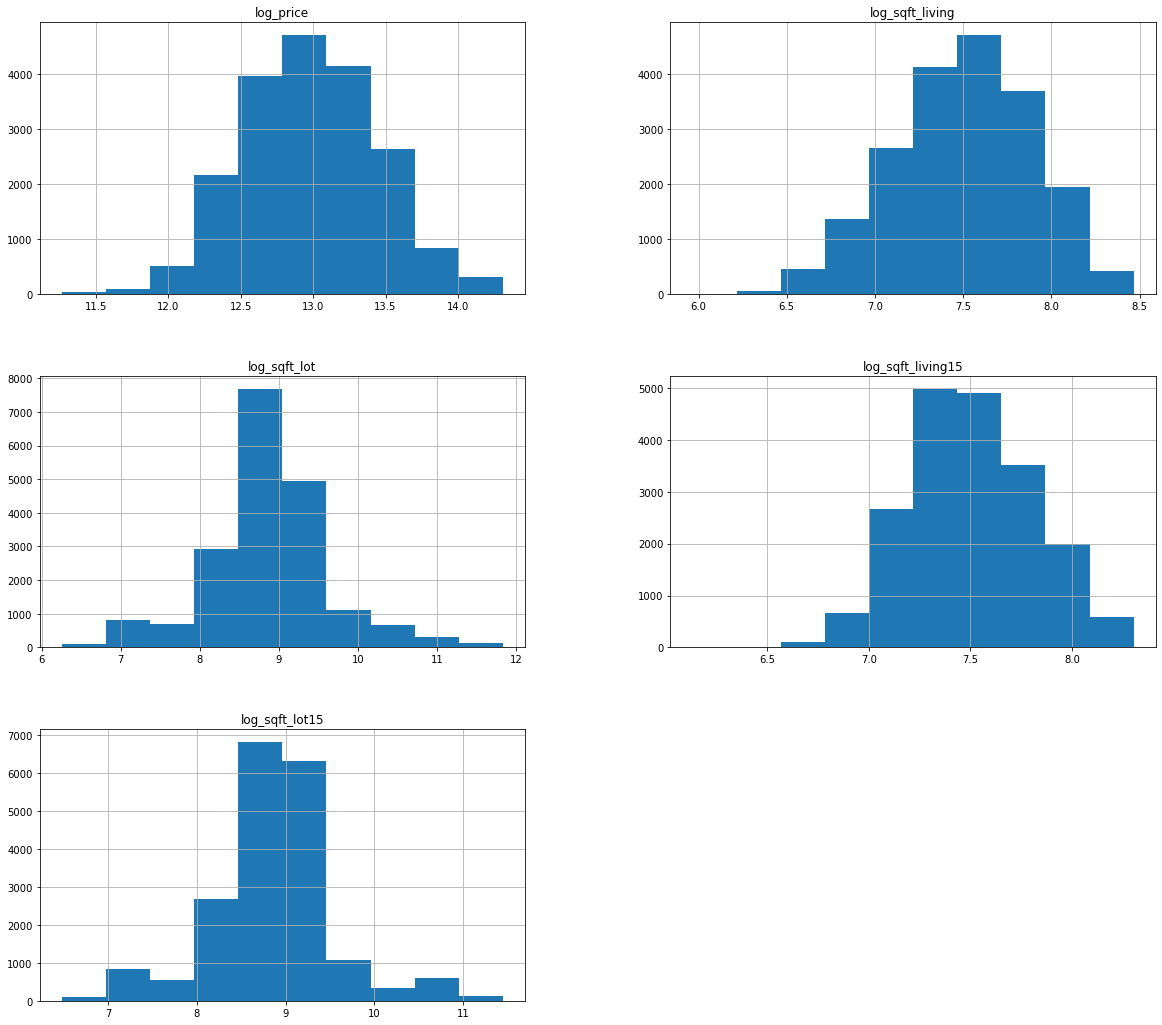

In [95]:
df_no_out_dum[['log_price','log_sqft_living', 'log_sqft_lot', 'log_sqft_living15', 'log_sqft_lot15']].hist(figsize = (20,18));

In [97]:
df_log = df_no_out_dum.drop(columns = ['price',
                                           'sqft_living', 
                                           'sqft_lot', 
                                           'sqft_living15', 
                                           'sqft_lot15', 
                                           'sqft_above', 
                                           'grade_5',
                                          ], axis = 1)

In [98]:
df_log = df_log.drop(columns = ['price_per_bedroom',
                                           'price_per_sqft', 
                                           
                                          ], axis = 1)

In [99]:
outcome = 'log_price'
prediction = df_log.drop(columns = ['log_price'], axis = 1)
prediction_variables = "+".join(prediction.columns)
formula = outcome + '~' + prediction_variables

In [100]:
model_4 = ols(formula = formula, data = df_log).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     2168.
Date:                Fri, 01 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:39:29   Log-Likelihood:                 296.57
No. Observations:               19414   AIC:                            -541.1
Df Residuals:                   19388   BIC:                            -336.4
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.5819      3.697     -0.969      0.333     -10.828       3.665
bedrooms             -0.0211      0.003     -7.787      0.000      -0.026      -0.016
bathrooms             0.0561      0.004     12.816      0.000       0.047       0.065
floors                0.0368      0.005      8.162      0.000       0.028       0.046
waterfront        -1.615e-13    3.7e-14     -4.367      0.000   -2.34e-13    -8.9e-14
zipcode              -0.0006   4.21e-05    -14.214      0.000      -0.001      -0.001
lat                   1.4047      0.013    105.031      0.000       1.378       1.431
long                 -0.0319      0.019     -1.721      0.085      -0.068       0.004
month                -0.0053      0.001     -9.601      0.000      -0.006      -0.004
age_home              0.0048      0.000     28.964      0.000       0.005       0.005
yrsince_reno         -0.0010      0.000     -5.806      0.000      -0.001      -0.001
cond_2                0.1013      0.052      1.956      0.050      -0.000       0.203
cond_3                0.2061      0.048      4.278      0.000       0.112       0.301
cond_4                0.2648      0.048      5.495      0.000       0.170       0.359
cond_5                0.3237      0.048      6.680      0.000       0.229       0.419
grade_6               0.1442      0.017      8.370      0.000       0.110       0.178
grade_7               0.2817      0.017     16.477      0.000       0.248       0.315
grade_8               0.4414      0.018     24.674      0.000       0.406       0.476
grade_9               0.6442      0.019     33.703      0.000       0.607       0.682
grade_10              0.7709      0.021     36.925      0.000       0.730       0.812
grade_11              0.8717      0.029     30.167      0.000       0.815       0.928
view_1                0.1635      0.014     11.369      0.000       0.135       0.192
view_2                0.1273      0.009     14.172      0.000       0.110       0.145
log_sqft_living       0.3421      0.010     35.794      0.000       0.323       0.361
log_sqft_lot         -0.0046      0.006     -0.804      0.421      -0.016       0.007
log_sqft_living15     0.2283      0.009     24.543      0.000       0.210       0.247
log_sqft_lot15       -0.0649      0.006    -10.348      0.000      -0.077      -0.053
==============================================================================
Omnibus:                      316.458   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              630.225
Skew:                           0.021   Prob(JB):                    1.41e-137
Kurtosis:                       3.882   Cond. No.                     1.00e+16
==============================================================================

Notes:
[1] Standard Errors a

### Intepratation of Model 3

log_sqft_lot is no longer relevant

long is no longer relevant

waterfront is no longer relevant

In [101]:
X = df_log.drop("log_price", axis = 1)
y = df_log['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [102]:
model4_linreg = LinearRegression()
model4_linreg.fit(X_train, y_train)
y_pred = model4_linreg.predict(X_test)
residuals = y_pred - y_test

In [103]:
model4_linreg.coef_

array([-2.40844132e-02,  5.95381265e-02,  3.95813845e-02,  2.83661983e-14,
       -6.32174309e-04,  1.39921792e+00, -2.36832120e-02, -5.49866468e-03,
        4.98397067e-03, -1.09512615e-03,  8.01410078e-02,  1.85604165e-01,
        2.44572234e-01,  3.04363383e-01,  1.37185940e-01,  2.77238918e-01,
        4.32238941e-01,  6.34582772e-01,  7.55016144e-01,  8.55488055e-01,
        1.62555654e-01,  1.26252189e-01,  3.44747874e-01, -4.41719371e-03,
        2.27653995e-01, -6.47066978e-02])

In [104]:
mse_train = mean_squared_error(y_train, model4_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 0.23946678753248407
Test RMSE: 0.23495204448852341


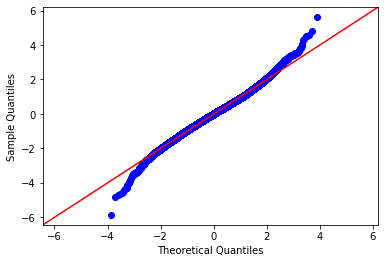

In [105]:
fig = sm.graphics.qqplot(model_4.resid, dist=stats.norm, line='45', fit=True)

### Model 5

log_sqft_lot no longer relevant
waterfront no longer relevant

In [107]:
df_log5 = df_log.drop(columns = ['log_sqft_lot', 'waterfront' ], axis = 1,)
df_log5.reset_index(inplace=True)

In [108]:
outcome = 'log_price'
prediction = df_log5.drop(columns = ['log_price'], axis = 1)
prediction_variables = "+".join(prediction.columns)
formula = outcome + '~' + prediction_variables

In [109]:
model_5 = ols(formula = formula, data = df_log5).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     2168.
Date:                Fri, 01 Jul 2022   Prob (F-statistic):               0.00
Time:                        18:23:23   Log-Likelihood:                 296.73
No. Observations:               19414   AIC:                            -541.5
Df Residuals:                   19388   BIC:                            -336.7
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.7403      3.679     -1.017      0.309     -10.951       3.470
id                -5.965e-13   6.04e-13     -0.988      0.323   -1.78e-12    5.87e-13
bedrooms             -0.0211      0.003     -7.804      0.000      -0.026      -0.016
bathrooms             0.0561      0.004     12.847      0.000       0.048       0.065
floors                0.0371      0.004      8.287      0.000       0.028       0.046
zipcode              -0.0006    4.2e-05    -14.194      0.000      -0.001      -0.001
lat                   1.4049      0.013    105.176      0.000       1.379       1.431
long                 -0.0321      0.018     -1.737      0.082      -0.068       0.004
month                -0.0053      0.001     -9.620      0.000      -0.006      -0.004
age_home              0.0048      0.000     28.955      0.000       0.005       0.005
yrsince_reno         -0.0010      0.000     -5.832      0.000      -0.001      -0.001
cond_2                0.1017      0.052      1.964      0.050       0.000       0.203
cond_3                0.2072      0.048      4.304      0.000       0.113       0.302
cond_4                0.2658      0.048      5.521      0.000       0.171       0.360
cond_5                0.3249      0.048      6.711      0.000       0.230       0.420
grade_6               0.1445      0.017      8.386      0.000       0.111       0.178
grade_7               0.2821      0.017     16.502      0.000       0.249       0.316
grade_8               0.4421      0.018     24.705      0.000       0.407       0.477
grade_9               0.6449      0.019     33.735      0.000       0.607       0.682
grade_10              0.7714      0.021     36.943      0.000       0.731       0.812
grade_11              0.8720      0.029     30.175      0.000       0.815       0.929
view_1                0.1637      0.014     11.382      0.000       0.136       0.192
view_2                0.1274      0.009     14.182      0.000       0.110       0.145
log_sqft_living       0.3411      0.009     36.087      0.000       0.323       0.360
log_sqft_living15     0.2285      0.009     24.563      0.000       0.210       0.247
log_sqft_lot15       -0.0696      0.003    -20.798      0.000      -0.076      -0.063
==============================================================================
Omnibus:                      315.873   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              629.006
Skew:                           0.019   Prob(JB):                    2.59e-137
Kurtosis:                       3.881   Cond. No.                     1.17e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The conditi

Observations all features look good need to check for multicolinearity between features

In [110]:
X = df_log5.drop("log_price", axis = 1)
y = df_log5['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [111]:
model5_linreg = LinearRegression()
model5_linreg.fit(X_train, y_train)
y_pred = model5_linreg.predict(X_test)
residuals = y_pred - y_test

In [112]:
model5_linreg.coef_

array([-3.41062579e-13, -2.41191073e-02,  5.96449672e-02,  3.98736836e-02,
       -6.30874648e-04,  1.39957695e+00, -2.41862747e-02, -5.50437283e-03,
        4.98189462e-03, -1.09905839e-03,  8.07199723e-02,  1.86783097e-01,
        2.45759597e-01,  3.05653734e-01,  1.37325646e-01,  2.77528706e-01,
        4.32701921e-01,  6.35159038e-01,  7.55381898e-01,  8.55646703e-01,
        1.62625976e-01,  1.26360866e-01,  3.43768632e-01,  2.27760100e-01,
       -6.90077793e-02])

In [113]:
mse_train = mean_squared_error(y_train, model5_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 0.23946844789845467
Test RMSE: 0.23494303285638232
